In [229]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder #label non-numeric data to numeric values

In [256]:
#Load Datasets
df1 = pd.read_csv("train.csv") #training dataset
df2 = pd.read_csv("test.csv")  #testing dataset

In [231]:
#peek at data how it looks like
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [232]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [233]:
#Data cleaning and Preprocessing
# we dont need id so dropping it
df1 =  df1.drop(['Id'],axis=1)

In [234]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [235]:
df1.shape #prints number of row and columns

(1460, 80)

In [236]:
df1.columns #prints all the columns name 

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [237]:
#Describe functions helps to anazyle data more deeply
df1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [238]:
df1['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [239]:
#having a look at the features of numeric type and non numeric types
df1_numeric=df1.select_dtypes(include=[np.number])
df1_non_numeric=df1.select_dtypes(exclude=[np.number])

print(df1_numeric.dtypes,"\n", "+-+"*84,"\n",df1_non_numeric.dtypes)


MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object 
 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-

In [240]:
#lets have a look at correlation between the numeric values
#here we look at the correlation between the features and target
#here are the 5 most positively and negatively correlated features

corr = df1_numeric.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n'),
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [241]:
# we can createa pivot table to further ellaborate the relationship between SalePrice and OverallQuality
quality_pivot = df1.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
quality_pivot
#it shows median value for each quality rating

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


Text(0, 0.5, 'SalePrice')

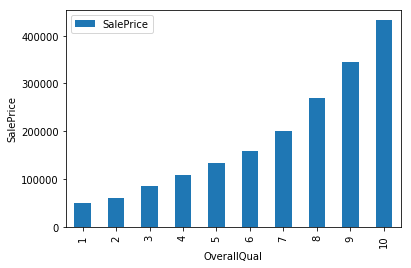

In [242]:
#let's further visualize the table through a barplot
quality_pivot.plot(kind='bar')
plt.ylabel("SalePrice")

we can see that with increase in the overall quality SalePrice increase gradualy

Text(0.5, 0, 'Ground Living Area(Square Foot)')

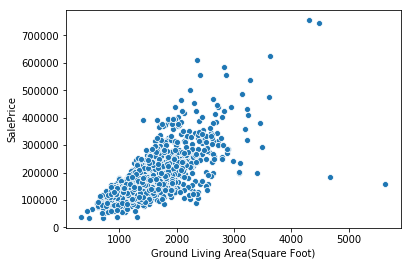

In [243]:
#now let us see the plot between the SalePrice and GrLiveAr

sns.scatterplot(x=df1['GrLivArea'],y=df1['SalePrice'])
plt.xlabel('Ground Living Area(Square Foot)')

we see that increase in GrArea, increases the sale Price

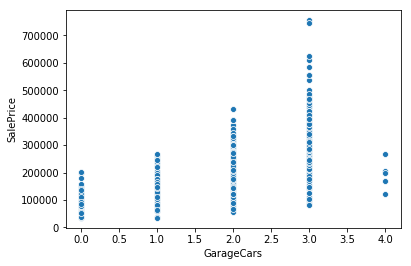

In [244]:
#For Garage Cars
sns.scatterplot(x=df1['GarageCars'],y=df1['SalePrice'])

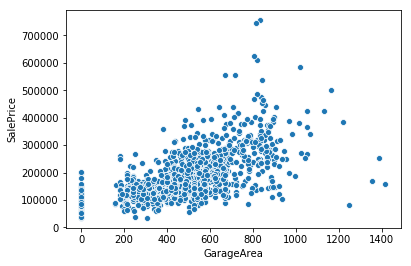

In [245]:
#For Garage Area
sns.scatterplot(x=df1['GarageArea'],y=df1['SalePrice'])

we can see that there are many houses with no garagearea and there are some outliers too. So we need to dal with that too

In [246]:
df1 = df1[df1['GarageArea']<1200]

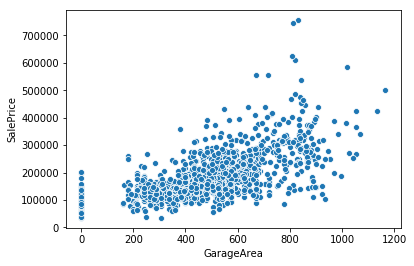

In [247]:
sns.scatterplot(x=df1['GarageArea'],y=df1['SalePrice'])

we removed the outliers more than 1200

# Dealing with NULL values

In [248]:
nulls = pd.DataFrame(data=df1.isnull().sum().sort_values(ascending=False))[:19]
nulls.columns = ['Null Values']
nulls.index.name = 'Features'
nulls

,Null Values
Features,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageType,81
GarageCond,81
GarageFinish,81


# Dealing with non-numeric features

In [249]:
non_num = df1.select_dtypes(exclude=np.number)
non_num.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


- count denotes number of non-null values
- unique denotes number of unique values in a feature
- top denotes the top repeating value in a feature
- freq denotes how many times top value is repeated

In [250]:
#before working on these values we must convert them into workable numeric values
#For MSZoing

print(df1.MSZoning.value_counts())

RL         1147
RM          218
FV           65
RH           16
C (all)       9
Name: MSZoning, dtype: int64


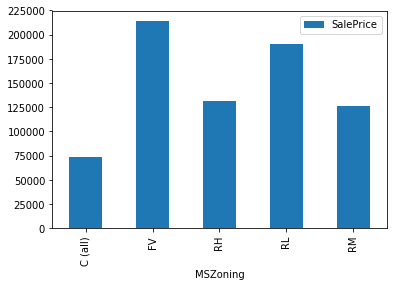

In [251]:
MSZoning_pivot = df1.pivot_table(index='MSZoning', values='SalePrice')
MSZoning_pivot.plot(kind="bar")

In [253]:
#when converting the type of the feature it must be done for both train and test dataset
#because we cannot compare apple with orange
le=LabelEncoder()
df1['MSZoning'] = le.fit_transform(df1.MSZoning) #for training dataset
df2['MSZoning'] = le.fit_transform(df2.MSZoning) #for testing dataset


TypeError: '<' not supported between instances of 'str' and 'float'

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [264]:
if(df2[df2['MSZoning']]=="C (all)"):
    df2[df2['MSZoning']]="RL"

ValueError: cannot index with vector containing NA / NaN values

In [131]:
print(df1.MSZoning.value_counts())

3    1147
4     218
1      65
2      16
0       9
Name: MSZoning, dtype: int64


In [127]:
#For Street
print(df1.Street.value_counts())

Pave    1450
Grvl       5
Name: Street, dtype: int64


In [133]:
df1['Street']= le.fit_transform(df1.Street)
df2['Street']= le.fit_transform(df2.Street)
print(df1.Street.value_counts())

1    1450
0       5
Name: Street, dtype: int64


# Dealing with null values

one simple,fast and easy way to deal with null values is to take mean of the non null values and assign it to null places

In [134]:
#interpolate() fills all NaN values 
data = df1.select_dtypes(include=[np.number]).interpolate().dropna()

In [144]:
#checking if data has any null values or not
sum(data.isnull().sum() != 0)

0

# Building a learning model

Using a linear regression

In [203]:
#before running a regression on dataset we need to split it into training and testing set
X = data.drop('SalePrice',axis=1)
y = np.log(df1.SalePrice) #log helps to converge the value having large difference between the values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [204]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)


In [205]:
predictions = model.predict(X_test)

In [206]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.017524277505069078


Text(0.5, 1.0, 'Linear Regression Model')

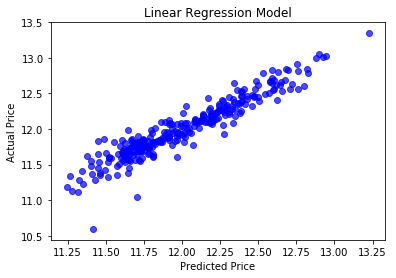

In [207]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

In [ ]:
#model can be further refined with regularization

# For Submission to Kaggle

In [212]:
submission = pd.DataFrame()
submission['Id'] = df2.Id

In [214]:
feats = df2.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [215]:
predictions = model.predict(feats)

ValueError: shapes (1459,36) and (38,) not aligned: 36 (dim 1) != 38 (dim 0)

In [225]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,3,65.0,8450,1,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,3,80.0,9600,1,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,3,68.0,11250,1,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,3,60.0,9550,1,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,3,84.0,14260,1,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,250000


In [226]:
feats.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
